<a href="https://colab.research.google.com/github/RandDahmash/Mining-project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('students_adaptability_level_online_education.csv')
df=pd.DataFrame(data)
df_copy=df.copy()
df.head()



,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [199]:
#Statistical summries
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


From the statistical summary, we can see for each attribute how many entries there are (count), how many different categories exist (unique), which value appears the most (top), and how many times it appears (freq). This helps me notice which values are the most common, like the most used device or the most frequent institution type.


Because the data is mostly categorical (not numeric), we can’t apply the five-number summary [which shows the minimum, Q1, median, Q3, and maximum] the way we do with numeric columns.

In [200]:

print("\nTotal number of missing values in the dataset:", df.isna().sum())


Total number of missing values in the dataset: Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


The dataset contains no missing values in any column (all 1205 rows × 14 attributes are complete). Therefore, no imputation or deletion of missing data is required at this stage.

In [203]:
def interval_to_midpoint(interval):
    # Split the interval by the dash (e.g., "1-5" becomes ["1", "5"])
    lower, upper = map(int, interval.split('-'))
    # Calculate the midpoint
    return (lower + upper) // 2

# Apply the conversion function to the 'age' column
df['Age'] = df['Age'].apply(interval_to_midpoint)

# Now, the 'age' column should contain numerical midpoints
print("Age values after converting it:\n")
print(df['Age'])

Age values after converting it:

0       23
1       23
2       18
3       13
4       18
        ..
1200    18
1201    18
1202    13
1203    18
1204    13
Name: Age, Length: 1205, dtype: int64


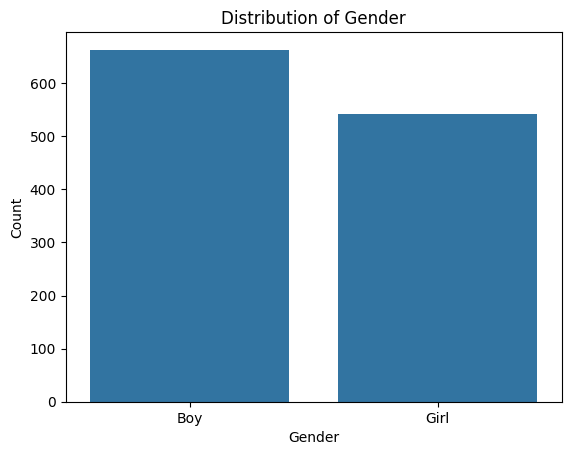

In [201]:
#Bar-plot for Gender attribute
sns.countplot(x='Gender',data=df)
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.show()

Distribution of Gender: Bar Chart
This bar chart shows that the dataset has more boys (about 55%) than girls (about 45%).. the difference is not very large, but boys are still the majority group.


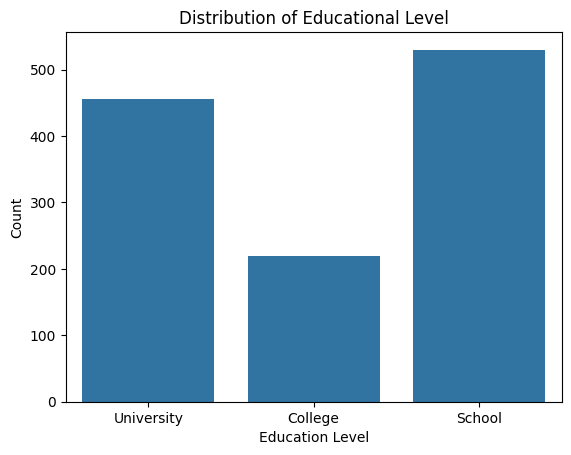

In [143]:
##Bar-plot for  Education Level attribute
sns.countplot(x='Education Level', data=df)
plt.title("Distribution of Educational Level")
plt.ylabel("Count")
plt.show()

Distribution of Educational Level: Bar Chart
This bar chart shows that school students form the largest group (about %44), followed by university students (about 39%).. college students are the smallest group compared to the others (about 17%).


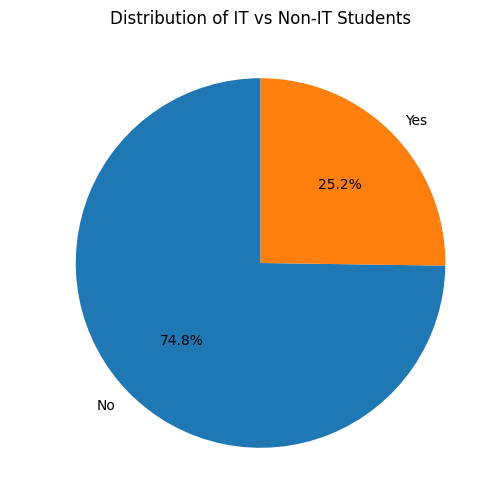

In [144]:
# Count values for IT Student
counts = df["IT Student"].value_counts()

# Pie chart
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of IT vs Non-IT Students")
plt.ylabel(' ')
plt.show()

Distribution of IT vs Non-IT Students: Pie Chart
This pie chart shows that about 75% of the students are non-IT, while only around 25% are IT students. Which means IT students are much fewer in this dataset.



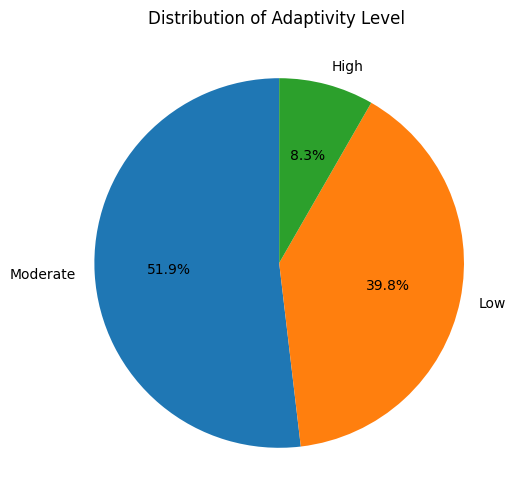

In [145]:
#class lable distribution

counts = df["Adaptivity Level"].value_counts()
counts.plot.pie( autopct='%1.1f%%',figsize=(6,6) ,startangle=90)
plt.title("Distribution of Adaptivity Level ")
plt.ylabel(' ')
plt.show()

Distribution of Adaptivity Level: Pie Chart
This pie chart shows that the majority of students have a moderate adaptability level (about 52%).. a smaller group is at low level (about 40%), and very few students are at high adaptability (about 8%).



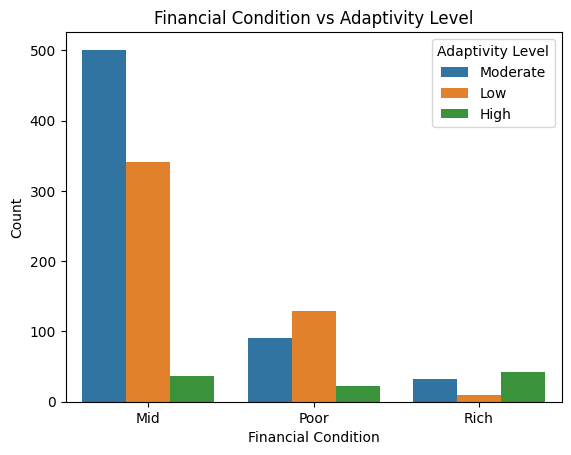

In [146]:
#Grouped bar chart Financial Condition and Adaptivity Level
sns.countplot(x="Financial Condition", hue="Adaptivity Level", data=df)
plt.title("Financial Condition vs Adaptivity Level")
plt.ylabel("Count")
plt.show()


Financial Condition vs Adaptivity Level: Bar Chart
This bar chart shows that most students from middle financial condition are at moderate adaptability (about 55%).. students from poor condition are more likely to have low adaptability (about 60%), while rich students are very few overall (less than 5%).


In [206]:
import pandas as pd

# Load raw dataset
df_raw = pd.read_csv("https://raw.githubusercontent.com/RandDahmash/Mining-project/main/Dataset/Raw_dataset.csv")

# Convert Age ranges to numeric midpoints
age_mapping = {
    "16-20": 18,
    "21-25": 23,
    "26-30": 28,
    "31-35": 33,
    "36-40": 38
}
df_raw["Age_num"] = df_raw["Age"].map(age_mapping)

In [205]:
#Missing values , we do not have missing values
df = pd.read_csv('Cleaned_dataset.csv')
missing_values = df.isna().sum()
print("\nTotal number of missing values in the dataset:",
      df.isna().sum())


Total number of missing values in the dataset: Gender                  0
Age                     0
Education Level         0
Institution Type        0
IT Student              0
Location                0
Load-shedding           0
Financial Condition     0
Internet Type           0
Network Type            0
Class Duration          0
Self Lms                0
Device                  0
Adaptivity Level        0
Age_num                71
dtype: int64


In [207]:
from scipy.stats import zscore

# Get Age as numeric array
data = df_raw["Age_num"].values

# Calculate z-scores
z_scores = zscore(data)
threshold = 2   # you can also try 3 for stricter outlier detection

# Detect outliers
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > threshold]
print("Outliers using Z-Score:", outliers)

Outliers using Z-Score: []


We checked for outliers in the Age column using the Z-score method. No outliers were detected, meaning all age groups fall within a reasonable range

In [208]:
# Check for duplicate rows
num_duplicates = df_raw.duplicated().sum()
print("Number of duplicate rows:", num_duplicates , "\n")

df_raw = df_raw.drop_duplicates()
print("DataFrame after dropping all duplicate rows:\n")
print(df_raw)
df_raw.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 949 

DataFrame after dropping all duplicate rows:

     Gender     Age Education Level Institution Type IT Student Location  \
0       Boy   21-25      University   Non Government         No      Yes   
1      Girl   21-25      University   Non Government         No      Yes   
2      Girl   16-20         College       Government         No      Yes   
3      Girl  15-Nov          School   Non Government         No      Yes   
4      Girl   16-20          School   Non Government         No      Yes   
...     ...     ...             ...              ...        ...      ...   
1124    Boy   21-25      University   Non Government        Yes       No   
1132    Boy   16-20         College       Government         No      Yes   
1149   Girl   16-20         College   Non Government         No       No   
1160    Boy   21-25      University   Non Government        Yes       No   
1197    Boy   21-25      University   Non Government        Yes      Yes   

     Load

We checked for duplicate rows in the dataset and found 949 duplicates.
Duplicate rows usually indicate repeated records of the same student, which can bias the analysis and models.
Therefore, we removed the duplicates to keep only unique entries.
The dataset is now cleaned and contains only distinct records

In [209]:
# Data Preprocessing
import pandas as pd
df = pd.read_csv('Cleaned_dataset.csv')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each column
for col in df.columns:
    if df[col].dtype == 'object':   # Only encode categorical columns
        df[col] = encoder.fit_transform(df[col])

print("\n All categorical attributes have been encoded into numeric form.")


#Display the data after Encode it
print("Dataset after Encoding : ")
print(df)

df.to_csv('Cleaned_dataset.csv', index=False)


 All categorical attributes have been encoded into numeric form.
Dataset after Encoding : 
     Gender  Age  Education Level  Institution Type  IT Student  Location  \
0         0    3                2                 1           0         1   
1         1    3                2                 1           0         1   
2         1    2                0                 0           0         1   
3         1    1                1                 1           0         1   
4         1    2                1                 1           0         1   
..      ...  ...              ...               ...         ...       ...   
251       0    3                2                 1           1         0   
252       0    2                0                 0           0         1   
253       1    2                0                 1           0         0   
254       0    3                2                 1           1         0   
255       0    3                2                 1          

In [210]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Cleaned_dataset.csv')

scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])

df.to_csv('Cleaned_dataset.csv', index=False)
print("Age column after Normalization : ")
print(df)

Age column after Normalization : 
     Gender  Age  Education Level  Institution Type  IT Student  Location  \
0         0  0.6                2                 1           0         1   
1         1  0.6                2                 1           0         1   
2         1  0.4                0                 0           0         1   
3         1  0.2                1                 1           0         1   
4         1  0.4                1                 1           0         1   
..      ...  ...              ...               ...         ...       ...   
251       0  0.6                2                 1           1         0   
252       0  0.4                0                 0           0         1   
253       1  0.4                0                 1           0         0   
254       0  0.6                2                 1           1         0   
255       0  0.6                2                 1           1         1   

     Load-shedding  Financial Condition  

Here in normalization we normalize the 'Age' column using Min-Max Scaling method since Age has a fixed and bounded range (1-30), min-max scaling is a good option as it retains the distribution of the data while normalizing to a 0-1 range

In [211]:
import pandas as pd

df = pd.read_csv('Cleaned_dataset.csv')

# Map textual duration ranges to numeric midpoints
duration_mapping = {
    "0": 0,
    "1-3": 2,
    "3-6": 4.5
}

# Replace the 'Class Duration' column with numeric equivalents
df['Class Duration'] = df['Class Duration'].replace(duration_mapping)

# Define bins for discretization
bins = [0, 1, 3, 6]  # Bins: 0-1 (No class), 1-3 (2hours), 3-6 (3hours)
labels = ['No class', '2 hours', '3 hours']

# Apply pd.cut() to discretize
df['Class Duration'] = pd.cut(
    df['Class Duration'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates='drop'
)

# Display the result
print("Class Duration after Discretization:")
print(df['Class Duration'])

# save the Binned dataset
df.to_csv('Binned_dataset.csv', index=False)


Class Duration after Discretization:
0       2 hours
1      No class
2      No class
3      No class
4      No class
         ...   
251     2 hours
252    No class
253    No class
254    No class
255     2 hours
Name: Class Duration, Length: 256, dtype: category
Categories (3, object): ['No class' < '2 hours' < '3 hours']


In [212]:

from scipy.stats import chi2_contingency
df = pd.read_csv('Binned_dataset.csv')
# Create a contingency table
contingency_table = pd.crosstab(df['Adaptivity Level'], df['Education Level'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected ", expected)


Contingency Table:
Education Level    0   1   2
Adaptivity Level            
0                  1  11  12
1                 28  37  49
2                 24  34  60

Chi-Square Statistic: 6.613178148599465
Degrees of Freedom: 4
Expected  [[ 4.96875    7.6875    11.34375  ]
 [23.6015625 36.515625  53.8828125]
 [24.4296875 37.796875  55.7734375]]





Here we created a contingency table to analyze the relationship between 'Adaptivity Level' and 'Education Level', and then perform a Chi-Square test to determine if there is a significant association between these two categorical variables.



In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_columns = ['Adaptivity Level', 'Education Level']

# One-hot encode categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df[categorical_columns])

# Define target variable
y = df['Adaptivity Level']

# Use RFE with Logistic Regression as the underlying model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
X_new = rfe.fit_transform(X_encoded, y)
# Display selected features
selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)



Selected Features: [1, 2]


Here we will use Recursive Feature Elimination (RFE), a wrapper method for feature selection that recursively removes the least important features based on model performance.

In [27]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,Age_num
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,185.000000
mean,0.421875,0.466406,1.265625,0.593750,0.304688,0.710938,0.789062,0.378906,0.460938,1.601562,1.042969,0.226562,0.855469,1.367188,21.702703
std,0.494826,0.223616,0.781997,0.492094,0.461177,0.454215,0.408773,0.651532,0.499448,0.543624,0.602372,0.419427,0.413746,0.649236,3.117838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,0.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000
50%,0.000000,0.400000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,23.000000
75%,1.000000,0.600000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,23.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,28.000000


After the preprocessing steps and encoding all categorical data into numeric form, we became able to compute and display the five-number summary (Minimum, Q1, Median, Q3, Maximum) for the numerical attributes:

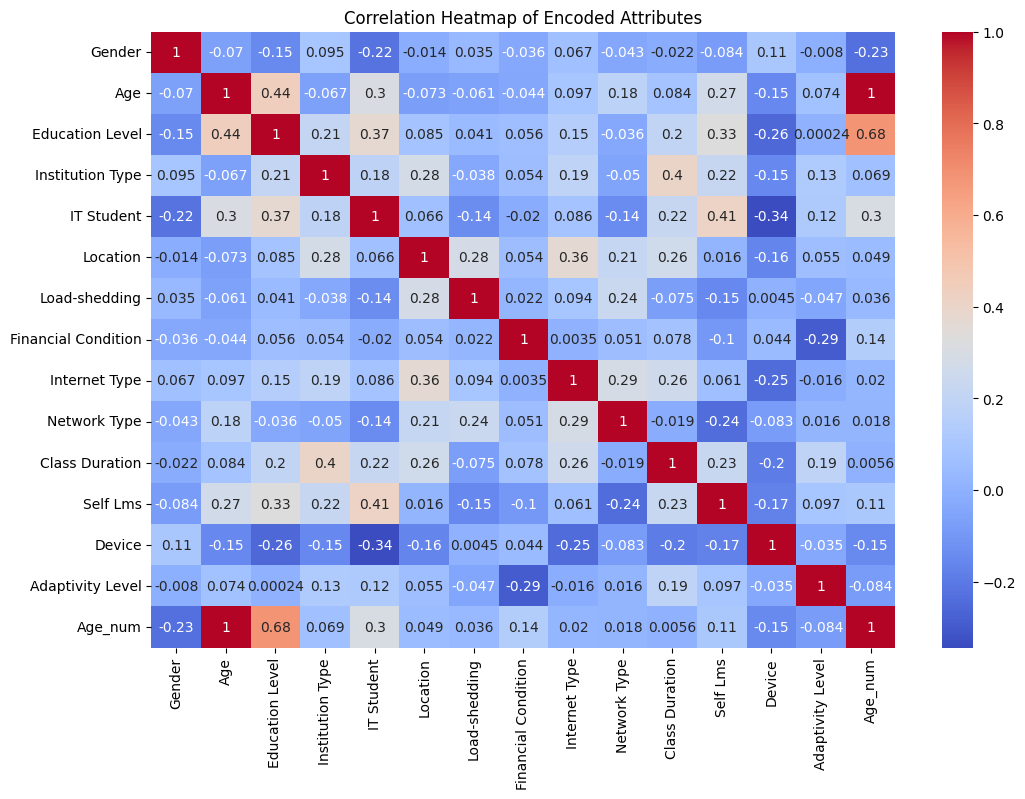

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Encoded Attributes")
plt.show()

The heatmap shows the correlation between all encoded attributes. Most correlations are weak, meaning the features are mostly independent. A few moderate ones can be noticed.. for example, Age and Education Level (≈0.38), where older students tend to have higher education levels, and IT Student and Self LMS Usage (≈0.45); showing IT students use LMS more actively. Overall, there are no strong correlations, so each attribute adds unique information.

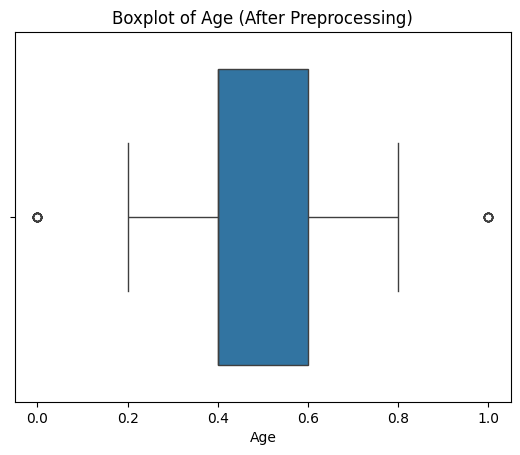

In [29]:
#Age Boxplot
sns.boxplot(x=df["Age"])
plt.title("Boxplot of Age (After Preprocessing)")
plt.xlabel("Age")
plt.show()

Since the data is now numeric, we used a boxplot to visualize the Age attribute. The boxplot shows the five-number summary (minimum, first quartile, median, third quartile, and maximum). It helps us easily see how the values are distributed and whether there are any outliers. The median is around 2, which matches the statistical summary. The distribution looks balanced, meaning there are no extreme values.

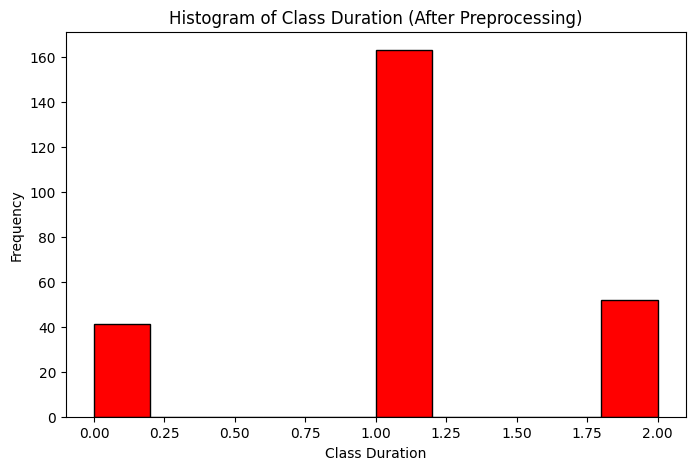

In [30]:
#Class Duration histogram
plt.figure(figsize=(8,5))
plt.hist(df["Class Duration"], bins=10, color='Red', edgecolor='black')
plt.title("Histogram of Class Duration (After Preprocessing)")
plt.xlabel("Class Duration")
plt.ylabel("Frequency")
plt.show()

This histogram shows how the Class Duration attribute is distributed after preprocessing. The bars represent the number of students that fall into each duration category. From the plot, we can see that most students have a class duration around category 1, while fewer students are in the higher duration categories. This helps us understand how balanced the class duration data is and whether it might affect adaptability in later analysis.